In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgo
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import geopandas as gpd
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Loading Data 

In [2]:
df = pd.read_csv('./covid_vaccination_vs_death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111


# Extraer datos de CHILE

In [3]:
countries = df.groupby('country')
chile = countries.get_group('Chile')

# Basic Information of Data

In [4]:
chile.shape

(269, 10)

In [5]:
chile.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,269.000000,2.690000e+02,2.690000e+02,2.690000e+02,269.000000,269.0,269.000000
mean,3675.000000,1.715330e+07,9.335486e+06,7.583415e+06,75.728625,19242590.0,48.514706
std,77.797815,1.039323e+07,4.950720e+06,5.128404e+06,54.466791,0.0,25.727932
min,3541.000000,1.174200e+04,1.071000e+04,1.032000e+03,0.000000,19242590.0,0.055658
25%,3608.000000,8.497707e+06,5.613902e+06,2.883805e+06,30.000000,19242590.0,29.174358
50%,3675.000000,1.831569e+07,1.037757e+07,7.938113e+06,70.000000,19242590.0,53.930230
75%,3742.000000,2.601022e+07,1.393449e+07,1.258335e+07,109.000000,19242590.0,72.414852
max,3809.000000,3.334900e+07,1.590983e+07,1.421379e+07,316.000000,19242590.0,82.680310


In [6]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 3541 to 3809
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               269 non-null    int64  
 1   country                  269 non-null    object 
 2   iso_code                 269 non-null    object 
 3   date                     269 non-null    object 
 4   total_vaccinations       269 non-null    float64
 5   people_vaccinated        269 non-null    float64
 6   people_fully_vaccinated  269 non-null    float64
 7   New_deaths               269 non-null    int64  
 8   population               269 non-null    float64
 9   ratio                    269 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 23.1+ KB


# Dealing with null-values
## missinggo cool tool to visualizing null values

<AxesSubplot:>

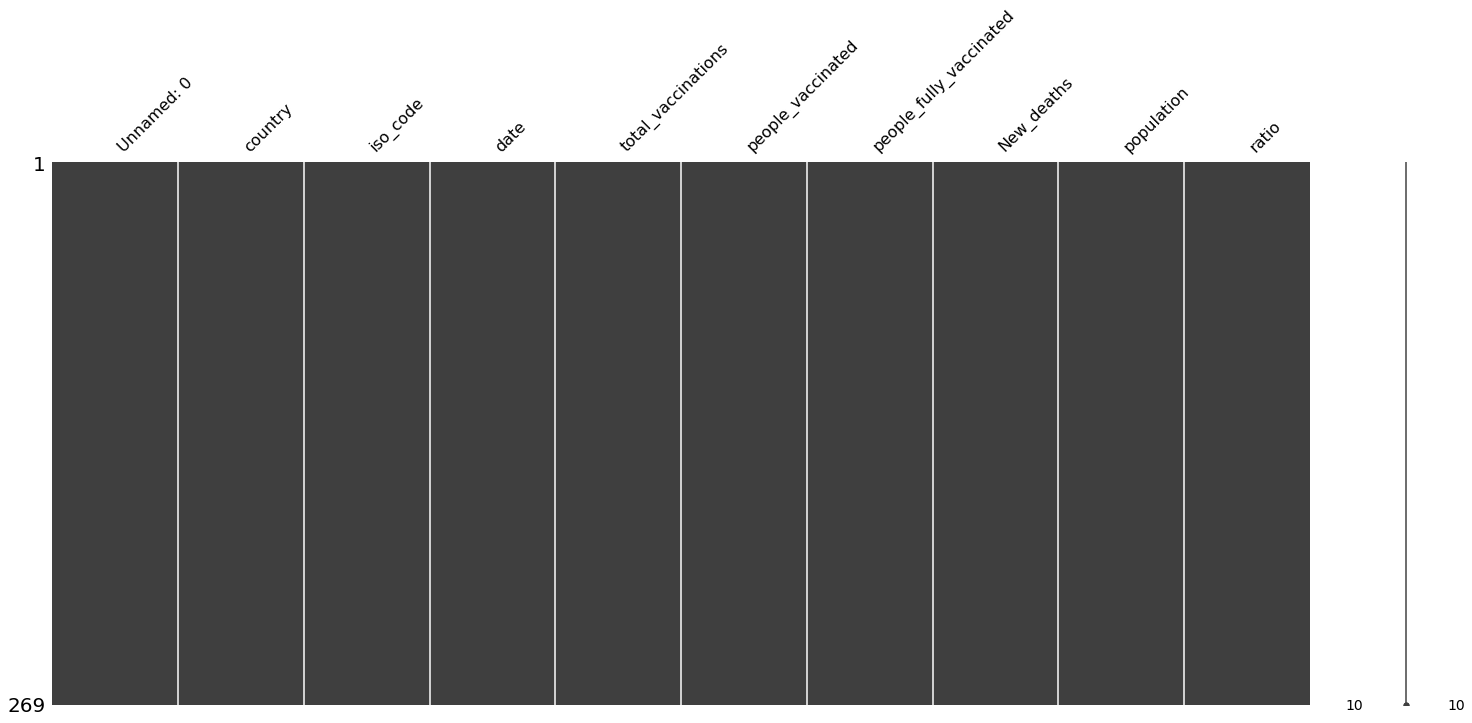

In [7]:
msgo.matrix(chile)
#not null,good data!

## Delete Unnamed column

In [8]:
chile = chile.drop(['Unnamed: 0'], axis=1)


In [9]:
chile.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
3541,Chile,CHL,2021-01-13,11742.0,10710.0,1032.0,20,19242590.0,0.055658
3542,Chile,CHL,2021-01-14,18659.0,12830.0,5829.0,22,19242590.0,0.066675
3543,Chile,CHL,2021-01-15,22090.0,13787.0,8303.0,90,19242590.0,0.071648
3544,Chile,CHL,2021-01-16,22180.0,13810.0,8370.0,75,19242590.0,0.071768
3545,Chile,CHL,2021-01-17,22180.0,13810.0,8370.0,66,19242590.0,0.071768


# What dates we have? 

In [10]:
chile.date.to_list()

['2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-16',
 '2021-01-17',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23',
 '2021-01-24',
 '2021-01-25',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-01-29',
 '2021-01-30',
 '2021-01-31',
 '2021-02-01',
 '2021-02-02',
 '2021-02-03',
 '2021-02-04',
 '2021-02-05',
 '2021-02-06',
 '2021-02-07',
 '2021-02-08',
 '2021-02-09',
 '2021-02-10',
 '2021-02-11',
 '2021-02-12',
 '2021-02-13',
 '2021-02-14',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-19',
 '2021-02-20',
 '2021-02-21',
 '2021-02-22',
 '2021-02-23',
 '2021-02-24',
 '2021-02-25',
 '2021-02-26',
 '2021-02-27',
 '2021-02-28',
 '2021-03-01',
 '2021-03-02',
 '2021-03-03',
 '2021-03-04',
 '2021-03-05',
 '2021-03-06',
 '2021-03-07',
 '2021-03-08',
 '2021-03-09',
 '2021-03-10',
 '2021-03-11',
 '2021-03-12',
 '2021-03-13',
 '2021-03-14',
 '2021-03-15',
 '2021-03-16',
 '2021-03-17',
 '2021-03-18',
 '2021-03-19',
 '2021-03-

## Ratio of people fully vaccinated

In [11]:
#total population in Chile
total_population_chile = chile['population'].max()
total_population_chile

19242590.0

In [12]:
#'people_fully_vaccinated' is an accumulation variable we need get the maximum value for each country
# and sum them
people_full_vaccinated = chile['people_fully_vaccinated'].max()
people_full_vaccinated

14213792.0

# Plotting Pie Chart

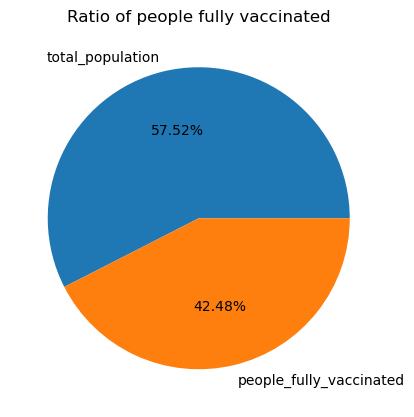

In [13]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population_chile,people_full_vaccinated],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

## Ratio of people vaccinated

In [14]:
#number of people who got at least one shot of COVID vaccine
people_one_vac = chile['people_vaccinated'].max()
rat_chile = chile['ratio'].max()
chile_deaths = chile['New_deaths'].max()
# df_country_deaths
rat_chile

82.68030966725374

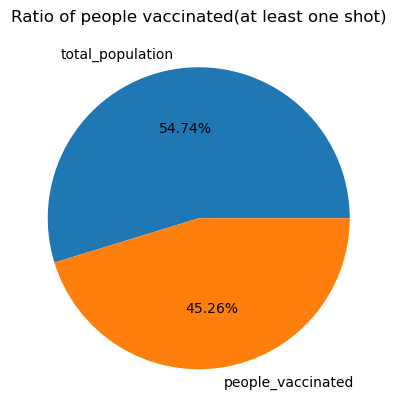

In [15]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population_chile,people_one_vac],
    autopct='%.2F%%',
    labels=['total_population','people_vaccinated'])
plt.title('Ratio of people vaccinated(at least one shot)')
plt.show()

# Grouping Data Times Series

In [16]:
date_group = chile.groupby('date').agg('sum').reset_index()
date_group

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,2021-01-13,11742.0,10710.0,1032.0,20,19242590.0,0.055658
1,2021-01-14,18659.0,12830.0,5829.0,22,19242590.0,0.066675
2,2021-01-15,22090.0,13787.0,8303.0,90,19242590.0,0.071648
3,2021-01-16,22180.0,13810.0,8370.0,75,19242590.0,0.071768
4,2021-01-17,22180.0,13810.0,8370.0,66,19242590.0,0.071768
...,...,...,...,...,...,...,...
264,2021-10-04,32774169.0,15663093.0,14180645.0,10,19242590.0,81.398050
265,2021-10-05,32942700.0,15740222.0,14196408.0,6,19242590.0,81.798874
266,2021-10-06,33096567.0,15809982.0,14203954.0,6,19242590.0,82.161403
267,2021-10-07,33250359.0,15873424.0,14210034.0,6,19242590.0,82.491099


# Plotting line chart

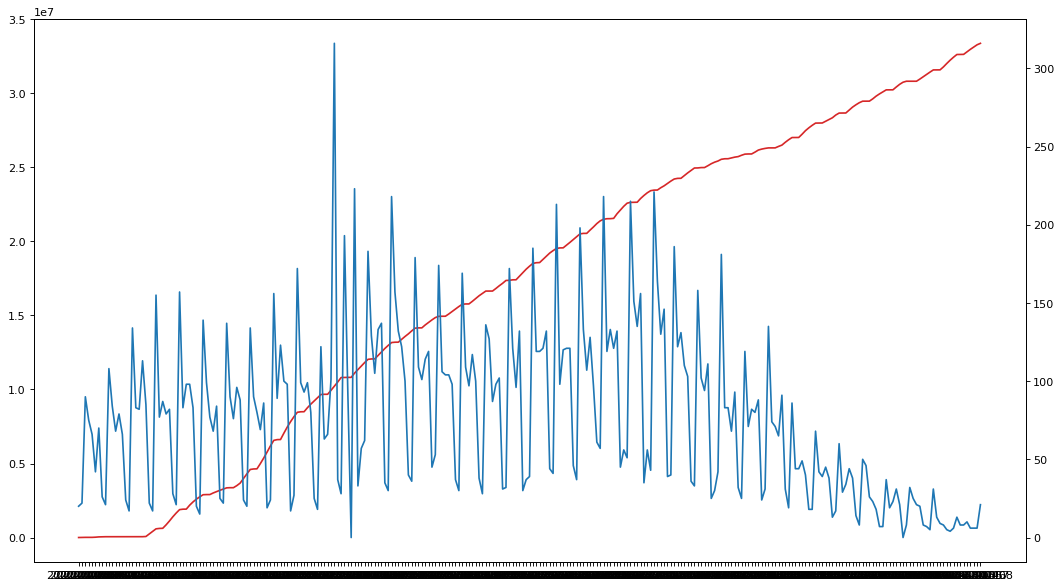

In [17]:
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['New_deaths']

fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y1,color='tab:red')

ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:blue')



Text(0.5, 1.0, 'Total de vacunación VS Nuevas muertes por COVID 19')

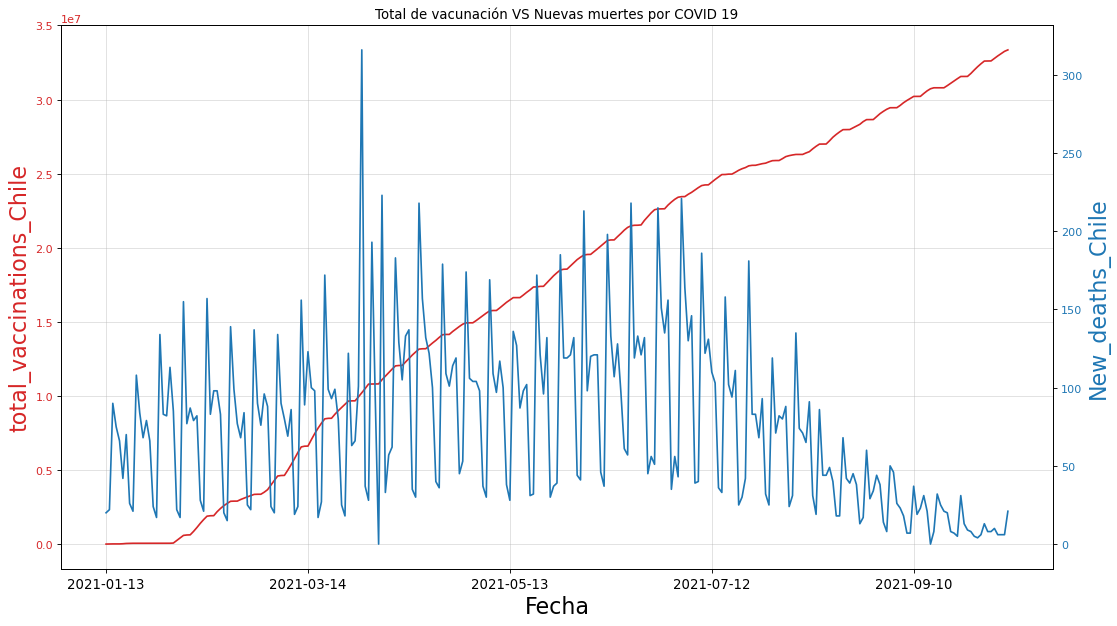

In [18]:
#preparing data
# total de vacunados vs numero de muertos en el rango de fechas para Chile
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['New_deaths']

#line 1
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y1,color='tab:red')

#line 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:blue')

#decorations line 1
ax1.set_xlabel('Fecha',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('total_vaccinations_Chile',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

#decorations line 2
ax2.set_ylabel('New_deaths_Chile',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('Total de vacunación VS Nuevas muertes por COVID 19')

#Back to original dateset

# Relationship Between variables (Plotting Heatmap with seaborn)

$$ r(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}[X] \operatorname{Var}[Y]}}
$$

In [19]:
chile_corr = chile.corr()
chile_corr.style.background_gradient()

C:\Users\ivana\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\ivana\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
total_vaccinations,1.000000,0.990772,0.994843,-0.226409,nan,0.990772
people_vaccinated,0.990772,1.000000,0.983095,-0.165672,nan,1.000000
people_fully_vaccinated,0.994843,0.983095,1.000000,-0.221010,nan,0.983095
New_deaths,-0.226409,-0.165672,-0.221010,1.000000,nan,-0.165672
population,nan,nan,nan,nan,nan,nan
ratio,0.990772,1.000000,0.983095,-0.165672,nan,1.000000


# Plotting scatter ---> CHILE

Text(0.5, 1.0, 'ratio vs New_deaths CHILE')

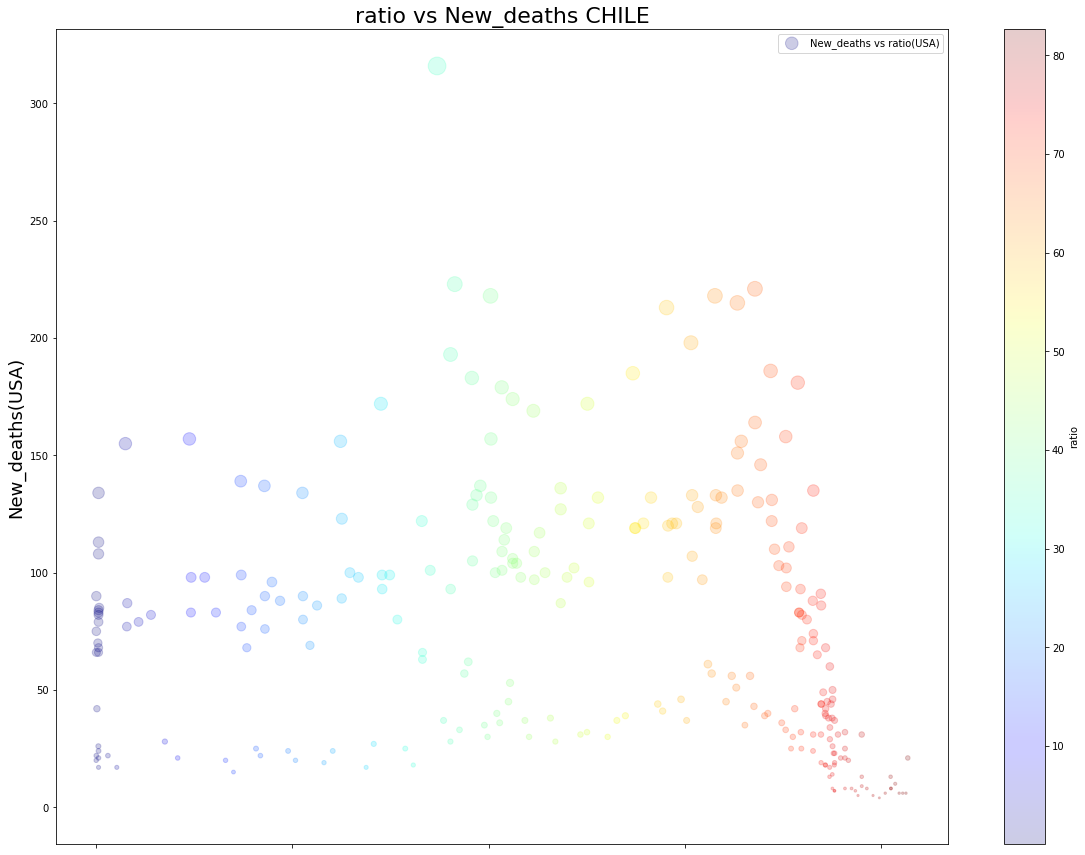

In [20]:
chile.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(USA)',
    alpha=0.2,
    figsize=(20,15),
    s=chile['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(USA)',fontsize=18)
plt.title('ratio vs New_deaths CHILE',fontsize=22)
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c).

# Daily World Deaths

In [21]:
date_group
time = date_group['date'].values.tolist()

px.line(x=time,y=date_group['New_deaths'].cumsum())
# In this case New Deaths is a cumulative number so we use function cumsum())

# Machine Learning ：SSSSSimple LinerRegression

In [22]:
# define x,y
x = chile[['ratio']]
y = chile[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)

# fitting in
liner = LinearRegression()
liner.fit(x_train,y_train)

# coefficients
print ('Coefficients: ', liner.coef_)
print ('Intercept: ',liner.intercept_)

# prediction
y_pre = std_y.inverse_transform(liner.predict(x_test))# inverse to original value
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[-0.12466028]]
Intercept:  [8.60556746e-17]
The prediction of New Deaths is :
 [[89.34495914]
 [80.64957419]
 [82.76162038]
 [79.32124542]
 [74.0835576 ]
 [78.10067982]
 [73.62899341]
 [87.44154209]
 [75.00929382]
 [73.08096756]
 [74.66113885]
 [71.27982706]
 [73.30390463]
 [82.65545184]
 [74.29518938]
 [74.2965176 ]
 [73.0785711 ]
 [71.45126227]
 [81.35721516]
 [85.50169689]
 [71.66648101]
 [74.3099452 ]
 [87.44108519]
 [87.66583183]
 [74.48564306]
 [91.63606491]
 [91.17575284]
 [73.97289088]
 [81.19350085]
 [90.92260785]
 [80.78141516]
 [84.2952629 ]
 [77.28348027]
 [73.31367063]
 [73.91724477]
 [91.65250931]
 [80.11854874]
 [84.48415798]
 [80.24341528]
 [80.37836056]
 [90.91149047]
 [79.64846553]
 [75.52771151]
 [91.636016  ]
 [82.93750228]
 [73.42647124]
 [82.01044685]
 [75.11170036]
 [81.75296456]
 [72.10978367]
 [91.63601729]
 [76.67075018]
 [73.20670542]
 [73.07851319]
 [80.65080974]
 [88.95901563]
 [74.59253877]
 [77.41402262]
 [72.81710674]
 [72.73115875]
 [91.

## Plotting with regression line

In [23]:
x = df_usa['ratio']
y = df_usa['New_deaths']

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio(USA)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

NameError: name 'df_usa' is not defined

# Evaluation : Mean Squared Error(MSE)

$$
M S E=\frac{S S E}{n}=\frac{1}{n} \sum i=1^{m} w i(y i-\hat{y i})^{2}
$$

### The mean squared error (MSE)[1][2] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. ---wiki

In [ ]:
mse = mean_squared_error(std_y.inverse_transform(y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',as_float(mse))

The Mean Squared Error(MSE) of y_pre is : 660882.90377080114558339118957519531250000000000000000000


$$
\mathrm{MAE}=\frac{\sum_{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}=\frac{\sum_{i=1}^{n}\left|e_{i}\right|}{n}
$$

### In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.---wiki

In [ ]:
mae = mean_absolute_error(std_y.inverse_transform(y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',as_float(mae))

The Mean Absolute Error(MAE) of y_pre is : 603.07769268033098342129960656166076660156250000000000
